In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

In [7]:
df=pd.read_csv("house/train.csv")


In [9]:
for column in df:
    print(df[column].nunique())

15035
365
3263
11
29
863
7678
6
2
5
5
12
789
271
116
65
70
4692
716
682
6958


C:\Users\Kyujin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kyujin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


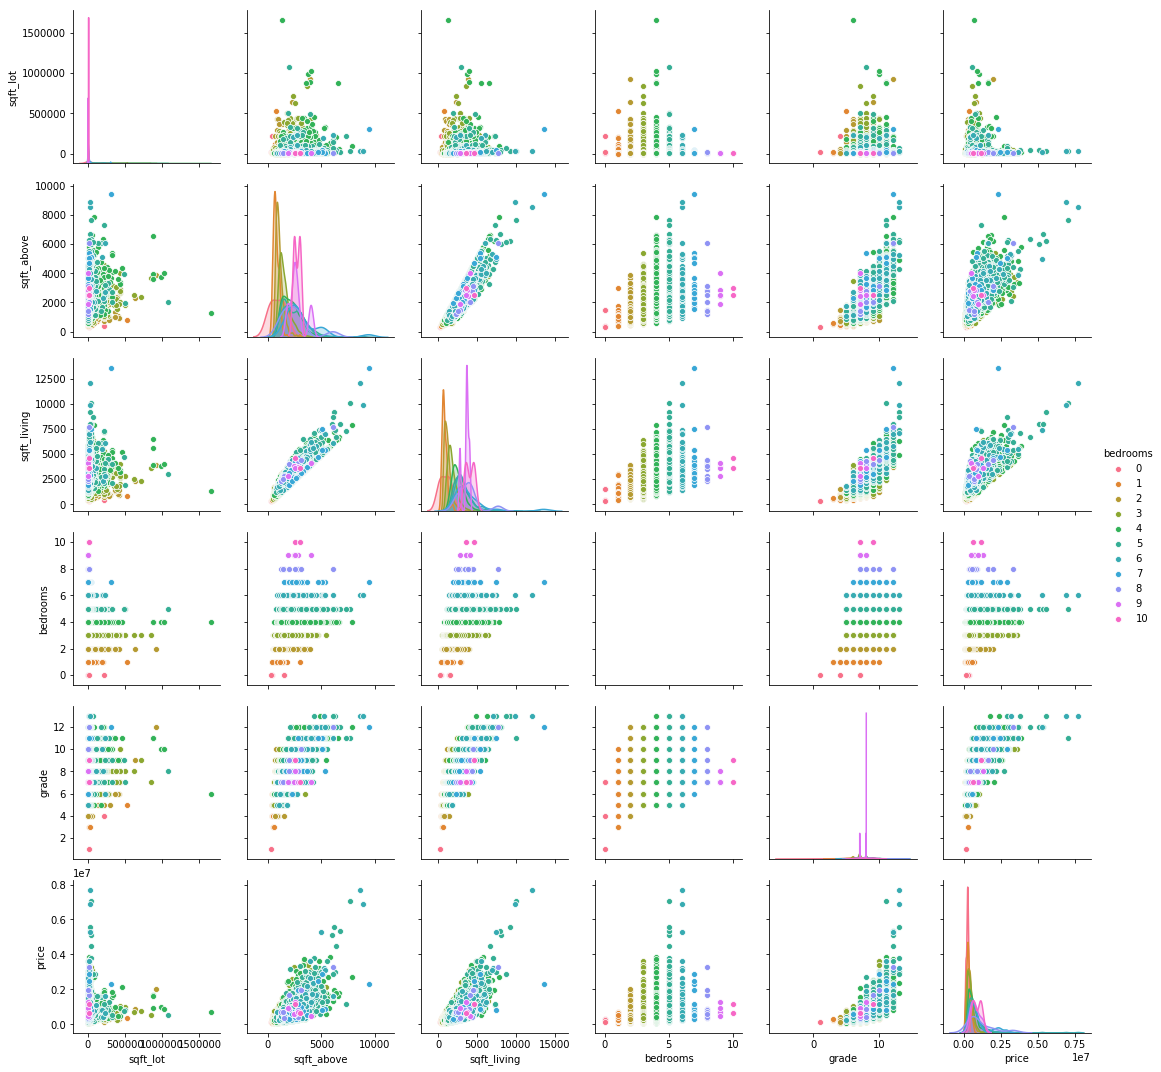

In [12]:
cols=['sqft_lot','sqft_above','sqft_living','bedrooms','grade','price']
sns.plotting_context(font_scale=1.5)
sns.pairplot(df[cols], hue='bedrooms')

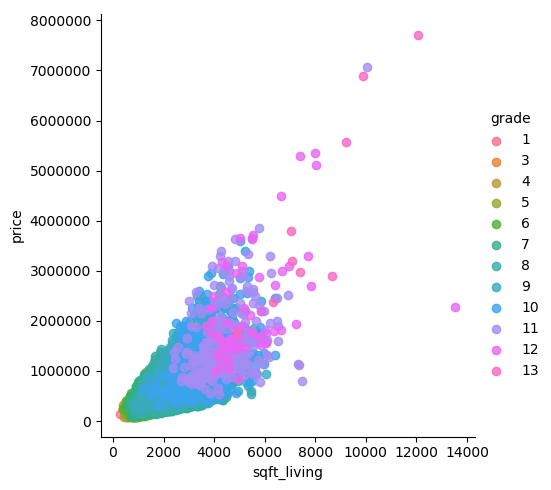

In [15]:
sns.lmplot(x='sqft_living', y='price',hue='grade', data=df, fit_reg=False)

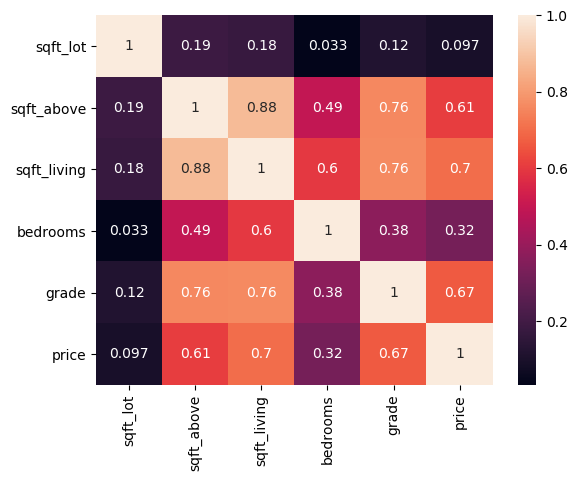

In [17]:
sns.heatmap(df[cols].corr(),annot=True)

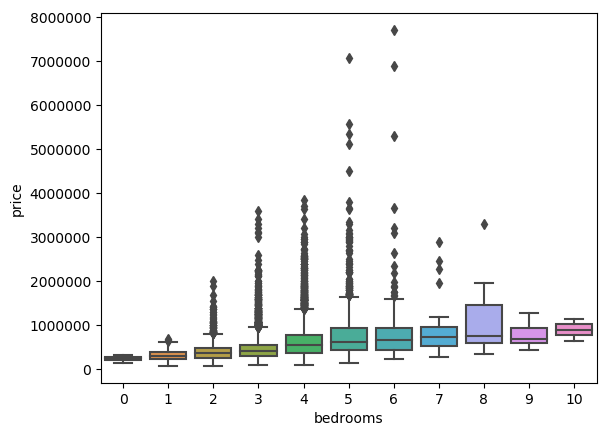

In [18]:
sns.boxplot(x=df['bedrooms'], y=df['price'])

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<Figure size 1200x800 with 0 Axes>

[Text(0.5, 0, 'sqft_lot'), Text(0.5, 0, 'living')]

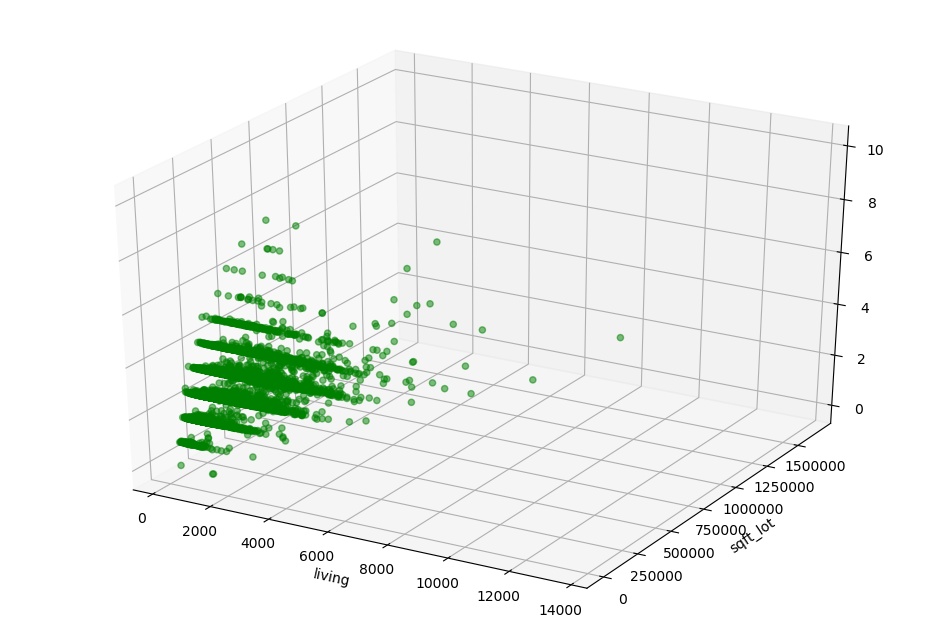

In [39]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1,projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c='green',alpha=.5)
ax.set(xlabel='living',ylabel='sqft_lot')

In [5]:
from sklearn import 
train_df1, train_df2=train_test_split(df, train_size=0.8, random_state=42)

SyntaxError: invalid syntax (<ipython-input-5-f1c63f945e61>, line 1)

In [6]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
model=LinearRegression()
model.fit(train_df1[['sqft_living']],train_df1[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
score=model.score(train_df2[['sqft_living']],train_df2[['price']])
print(format(score, '.3f'))

0.484


In [41]:
print(model.intercept_)
print(model.coef_)

[-53539.43162226]
[[284.98912866]]


In [7]:
from sklearn.metrics import confusion_matrix
xtrue=[2,0,2,2,0,1]
xpred=[0,0,2,2,0,2]
confusion_matrix(xtrue, xpred)
##실제가 0인데 예측값이 0인게 2개, 실제가 1인데 예측값이 1인 것 0개, 실제가 2인데 2로 나온값 2개

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [43]:
#이진분류
# 정확도 = (TP+TN) / (TP+TN+FP+FN)
# 정밀도 = TP
#


In [45]:
model.fit(train_df1[['sqft_living','bedrooms','bathrooms']],train_df1[['price']])
score=model.score(train_df2[['sqft_living','bedrooms','bathrooms']],train_df2[['price']])

print(format(score, '.3f'))

0.496


In [49]:
features=['sqft_living','bedrooms','bathrooms','floors','zipcode','view','waterfront','grade','yr_built']
model.fit(train_df1[['sqft_living','bedrooms','bathrooms','floors','zipcode','view','waterfront','grade','yr_built']],train_df1[['price']])
score=model.score(train_df2[['sqft_living','bedrooms','bathrooms','floors','zipcode','view','waterfront','grade','yr_built']],train_df2[['price']])

print(format(score, '.3f'))

0.657


In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
model=KNeighborsRegressor(n_neighbors=9)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features],train_df2['price'])
print(format(score, '.3f'))

0.539


In [56]:



model=DecisionTreeRegressor(random_state=42)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features],train_df2['price'])
print(format(score, '.3f'))
predicted=model.predict(train_df2[features])
print(predicted)

0.605
[269950. 235000. 856000. ... 200000. 585000. 390000.]


In [60]:
testdf=pd.read_csv('house/test.csv')
predicted=model.predict(testdf[features])
ss=pd.read_csv('house/sample_submission.csv')
ss['price']=predicted
ss.to_csv('sub_file.csv',index=False)

In [61]:
xdata=[[1,2],
       [2,3],
       [3,1],
       [4,3],
       [5,3],
       [6,2]]
ydata=[[0],
       [0],
       [0],
       [1],
       [1],
       [1]]

In [62]:
x=tf.placeholder(tf.float32, shape=[None, 2])
y=tf.placeholder(tf.float32, shape=[None, 1])
w=tf.Variable(tf.random_normal([2,1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')
hf=tf.sigmoid(tf.matmul(x,w)+b)

In [63]:
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [71]:
predicted=tf.cast(hf>0.5,dtype=tf.float32)
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [72]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv=sess.run([train, cost],feed_dict={x:xdata, y:ydata})
        if step & 2000==0:
            print(step, cv)
    hv,pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hf=", hv, "pred=", pv, 'acc=', av)

0 0.5674614
1 0.5497469
2 0.5336695
3 0.5190885
4 0.50587076
5 0.4938917
6 0.48303512
7 0.4731947
8 0.46427235
9 0.4561789
10 0.44883338
11 0.4421624
12 0.43609953
13 0.430585
14 0.4255651
15 0.4209913
32 0.3822538
33 0.38122782
34 0.38027295
35 0.379383
36 0.37855265
37 0.37777665
38 0.37705055
39 0.3763701
40 0.3757317
41 0.37513164
42 0.3745669
43 0.37403467
44 0.3735323
45 0.37305734
46 0.3726076
47 0.37218103
2048 0.2586923
2049 0.25865978
2050 0.25862724
2051 0.25859472
2052 0.25856224
2053 0.2585297
2054 0.2584972
2055 0.25846475
2056 0.25843227
2057 0.2583998
2058 0.25836733
2059 0.25833485
2060 0.2583024
2061 0.25826994
2062 0.2582375
2063 0.25820515
2080 0.25765502
2081 0.2576227
2082 0.25759044
2083 0.25755823
2084 0.25752595
2085 0.25749364
2086 0.25746146
2087 0.25742918
2088 0.25739697
2089 0.25736472
2090 0.25733253
2091 0.2573003
2092 0.25726813
2093 0.25723588
2094 0.25720373
2095 0.25717154
4096 0.20513834
4097 0.20511736
4098 0.20509638
4099 0.20507543
4100 0.2050544

In [9]:
xy=np.loadtxt('diabetes.csv',delimiter=',')

In [10]:
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [11]:
xdata=xy[:,0:-1]
xdata

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

In [12]:
ydata=xy[:,[-1]]
ydata

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [14]:
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([8,1]), name= 'weight')
b=tf.Variable(tf.random_normal([1]), name= 'bias')
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [15]:
predicted=tf.cast(hf>0.5,dtype=tf.float32)
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv=sess.run([train, cost],feed_dict={x:xdata, y:ydata})
        if step & 2000==0:
            print(step, cv)
    hv,pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hf=", hv, "pred=", pv, 'acc=', av)

ValueError: Cannot feed value of shape (759, 8) for Tensor 'Placeholder_2:0', which has shape '(?, 7)'